### Objective  

**Using Random Forest before feature selection**

In [1]:
import pandas as pd

> retrieve data

In [19]:
X_train = pd.read_csv('cache/4-X_train-upsampled.csv')
y_train = pd.read_csv('cache/4-y_train-upsampled.csv')
X_test = pd.read_csv('cache/4-X_test-upsampled.csv')
y_test = pd.read_csv('cache/4-y_test-upsampled.csv')

In [21]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(135940, 365)

(23853, 365)

(135940, 1)

(23853, 1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
cm_display.plot()

ValueError: could not convert string to float: 'TX'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 8, 9, 11, 12, 13, 14, 17, 18, 19, 20, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Score: 0.6143592761512432
Test Score: 0.5843290152182116


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 8, 9, 11, 12, 13, 14, 17, 18, 19, 20, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Value Counts of True Labels:
TARGET_B
0           22599
1            1254
Name: count, dtype: int64


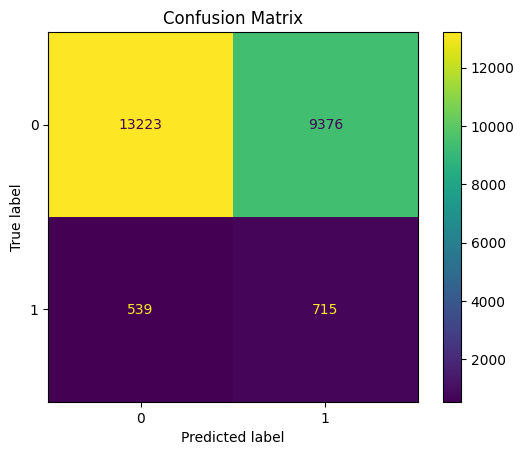

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load your dataset
X_train = pd.read_csv('./cache/4-X_train-upsampled.csv', index_col=False)
y_train = pd.read_csv('./cache/4-y_train-upsampled.csv', index_col=False)
X_test = pd.read_csv('./cache/4-X_test-upsampled.csv', index_col=False)
y_test = pd.read_csv('./cache/4-y_test-upsampled.csv', index_col=False)

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Define the column transformer to handle categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Define the pipeline with preprocessor and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        max_depth=5,
        min_samples_split=20,
        min_samples_leaf=20,
        max_samples=0.8,
        random_state=42
    ))
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train.values.ravel())

# Evaluate the model
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Display value counts of the true labels
print("Value Counts of True Labels:")
print(y_test.value_counts())

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
cm_display.plot()

# Show plot
import matplotlib.pyplot as plt
plt.title('Confusion Matrix')
plt.show()


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 11, 12, 13, 15, 18, 20, 21, 22, 24, 25, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 8, 11, 18, 20, 22, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 11, 12, 13, 15, 17, 20, 21, 22, 23, 24, 25, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [8, 9, 12, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26] during transform. These

Cross-Validation Scores: [0.60876122 0.61468295 0.61082095 0.60865088 0.61736796]
Mean CV Score: 0.6121
Standard Deviation of CV Scores: 0.0034


In [29]:
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 8, 9, 11, 12, 13, 14, 17, 18, 19, 20, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Training Score: 0.6144
Test Score: 0.5843
